# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Replace spaces with %20 to create url correctly
    city = city.replace(' ','%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "34ae911623f05d92ee567a8a29c29463"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=punta%20arenas
Processing Record 2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=hermanus
Processing Record 3 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=mahon
Processing Record 4 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=antofagasta
Processing Record 5 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=kavieng
City not found. Skipping...
Processing Record 6 | Abay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=abay
Processing Record 7 | Carnarvon
http://api.openweathermap

Processing Record 57 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=bredasdorp
City not found. Skipping...
Processing Record 58 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=bubaque
Processing Record 59 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=katsuura
Processing Record 60 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=albany
Processing Record 61 | Dārāb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=darab
Processing Record 62 | Paragominas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=paragominas
Processing Record 63 | Fontem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f0

Processing Record 112 | Astoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=astoria
Processing Record 113 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=bengkulu
Processing Record 114 | Wau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=waw
Processing Record 115 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=cayenne
Processing Record 116 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=bluff
Processing Record 117 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=san%20policarpo
City not found. Skipping...
Processing Record 118 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911

Processing Record 166 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=talnakh
Processing Record 167 | Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=progreso
Processing Record 168 | Nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=nador
Processing Record 169 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=cidreira
Processing Record 170 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=ilulissat
Processing Record 171 | Udarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=udarnyy
Processing Record 172 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=aks

Processing Record 221 | Saint-François
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=saint-francois
Processing Record 222 | Almenara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=almenara
Processing Record 223 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=baruun-urt
Processing Record 224 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=oranjestad
Processing Record 225 | Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=preobrazheniye
Processing Record 226 | Char Bhadrāsan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=char%20bhadrasan
Processing Record 227 | Kushiro
http://api.openweathermap.org/data/2.5/weather?units

City not found. Skipping...
Processing Record 275 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=broken%20hill
Processing Record 276 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=lorengau
Processing Record 277 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=paamiut
Processing Record 278 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=ginda
Processing Record 279 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=pisco
Processing Record 280 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=kirakira
City not found. Skipping...
Processing Record 281 | Savannah Bight
http://api.openweathermap.org/data/2.5/we

Processing Record 331 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=kamenka
Processing Record 332 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=fort%20nelson
Processing Record 333 | Gelemso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=gelemso
Processing Record 334 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=cherskiy
Processing Record 335 | Yerbogachën
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=yerbogachen
Processing Record 336 | Sørland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=sorland
Processing Record 337 | Nikšić
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8

Processing Record 387 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=ayan
Processing Record 388 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=bandarbeyla
Processing Record 389 | Nizhniy Odes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=nizhniy%20odes
Processing Record 390 | Phalaborwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=phalaborwa
Processing Record 391 | Todos Santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=todos%20santos
Processing Record 392 | Mbandaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=mbandaka
Processing Record 393 | Venezuela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae91

Processing Record 443 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=pacific%20grove
Processing Record 444 | Mékhé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=mekhe
Processing Record 445 | Ipoti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=ipoti
Processing Record 446 | Tromsø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=tromso
Processing Record 447 | Charters Towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=charters%20towers
Processing Record 448 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=havelock
Processing Record 449 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee5

Processing Record 499 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=turukhansk
Processing Record 500 | Amalāpuram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=amalapuram
Processing Record 501 | Mulchén
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=mulchen
Processing Record 502 | Minot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=minot
Processing Record 503 | Severobaykal'sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=severobaykalsk
Processing Record 504 | Gīdolē
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee567a8a29c29463&q=gidole
Processing Record 505 | Sabirabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34ae911623f05d92ee5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [6]:
#Save dataframe to CSV
weather_data.to_csv("/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Instructions/output_data/cities.csv", index=False, header=True)

#Display the dataframe
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1610999225,62,-53.1500,-70.9167,55.40,18.41
1,Hermanus,0,ZA,1610999227,78,-34.4187,19.2345,69.01,1.01
2,Mahon,0,ES,1610999387,81,39.8885,4.2658,44.60,4.61
3,Antofagasta,20,CL,1610999185,64,-23.6500,-70.4000,73.99,16.11
4,Kavieng,58,PG,1610999273,73,-2.5744,150.7967,82.83,12.84


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,529.000000,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000
mean,54.858223,1.611000e+09,72.032136,20.643682,19.623888,47.702174,8.133686
std,39.749556,2.882235e+02,20.617754,34.106412,89.875301,35.847903,5.795032
min,0.000000,1.610999e+09,1.000000,-54.800000,-179.166700,-61.600000,0.270000
25%,11.000000,1.610999e+09,62.000000,-6.644700,-58.736800,24.800000,3.600000
50%,71.000000,1.611000e+09,78.000000,22.566700,25.183300,60.870000,6.910000
75%,93.000000,1.611000e+09,88.000000,50.678900,92.750000,77.270000,11.270000
max,100.000000,1.611000e+09,100.000000,78.218600,178.416700,96.600000,33.240000


In [17]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index

humid_city_data

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1610999225,62,-53.1500,-70.9167,55.40,18.41
1,Hermanus,0,ZA,1610999227,78,-34.4187,19.2345,69.01,1.01
2,Mahon,0,ES,1610999387,81,39.8885,4.2658,44.60,4.61
3,Antofagasta,20,CL,1610999185,64,-23.6500,-70.4000,73.99,16.11
4,Kavieng,58,PG,1610999273,73,-2.5744,150.7967,82.83,12.84


In [19]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

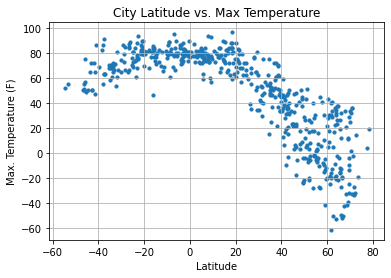

In [8]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Solutions/output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

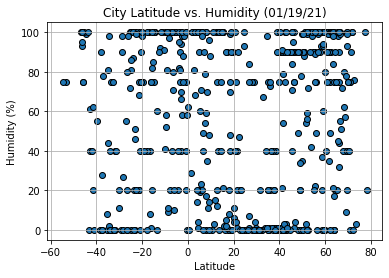

In [35]:
# Build scatter plots for latitude vs humidity 
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=1.0, label="Cities")
plt.grid()

#Incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Save the figure
plt.savefig("/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Solutions/output_data/Fig2.png")

#Show plot
plt.show()

## Latitude vs. Cloudiness Plot

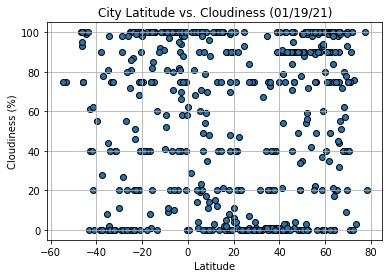

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Solutions/output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

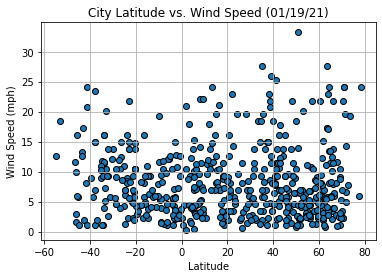

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mikaelshall/Desktop/unc-peace-data-pt-08-2020-u-c/02-Homework/05-Python-APIs/Solutions/output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(clean_city_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(clean_city_data["Lat"] < 0)]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.32810906559202185


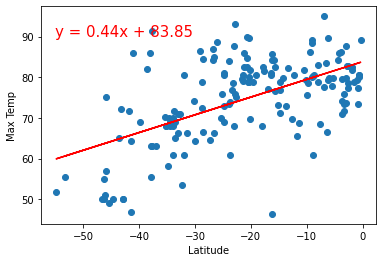

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15070799848865937


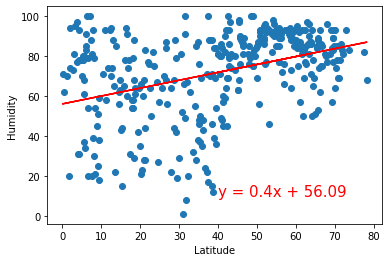

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03569064814294279


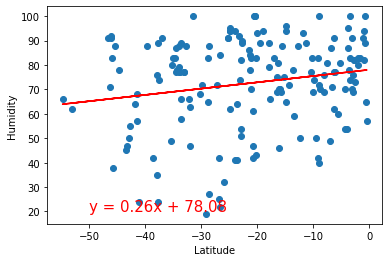

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.036483836658663574


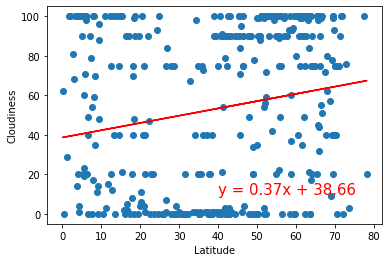

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.053921546375992245


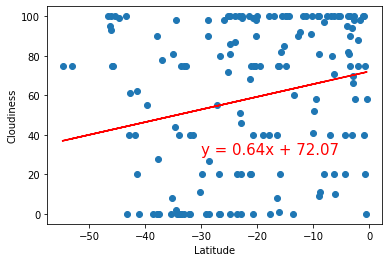

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 7.710385732584691e-05


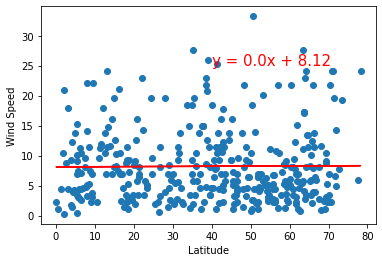

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

 ### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08583518293474054


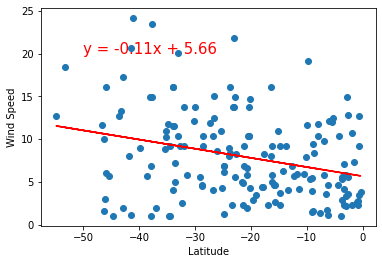

In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))